In [ ]:
# Load some test data
import pandas as pd
mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Import the libraries we need 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


In [ ]:
# need to deal with ?s in the data
mpg.loc[[32],'horsepower'] = 72
mpg.loc[[126],'horsepower'] = 85
mpg.loc[[330],'horsepower'] = 64
mpg.loc[[354],'horsepower'] = 83
mpg.loc[[336],'horsepower'] = 75
mpg.loc[[374],'horsepower'] = 90

In [ ]:
# one hot encode origin
mpg['origin'] = mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

mpg = pd.get_dummies(mpg, columns=['origin'], prefix='', prefix_sep='')


In [ ]:
X = mpg.drop(columns=["mpg","name"])
y = mpg.mpg

In [ ]:
# look at data, now it is all numeric
X


,cylinders,displacement,horsepower,weight,acceleration,year,Europe,Japan,USA
0,8,307.0,130,3504,12.0,70,0,0,1
1,8,350.0,165,3693,11.5,70,0,0,1
2,8,318.0,150,3436,11.0,70,0,0,1
3,8,304.0,150,3433,12.0,70,0,0,1
4,8,302.0,140,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,0,0,1
394,4,97.0,52,2130,24.6,82,1,0,0
395,4,135.0,84,2295,11.6,82,0,0,1
396,4,120.0,79,2625,18.6,82,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
# len(X_train[0])

In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='leaky_relu'))

model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               25250     
                                                                 
 dense_2 (Dense)             (None, 50)                12550     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 38,851
Trainable params: 38,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
4/4 [==============================] - 5s 139ms/step - loss: 537.7394 - mse: 537.7394 - val_loss: 578.1447 - val_mse: 578.1447
Epoch 2/2000
4/4 [==============================] - 0s 26ms/step - loss: 488.3573 - mse: 488.3573 - val_loss: 532.2869 - val_mse: 532.2869
Epoch 3/2000
4/4 [==============================] - 0s 19ms/step - loss: 450.0736 - mse: 450.0736 - val_loss: 498.8225 - val_mse: 498.8225
Epoch 4/2000
4/4 [==============================] - 0s 25ms/step - loss: 422.7308 - mse: 422.7308 - val_loss: 475.6094 - val_mse: 475.6094
Epoch 5/2000
4/4 [==============================] - 0s 22ms/step - loss: 403.8380 - mse: 403.8380 - val_loss: 459.6880 - val_mse: 459.6880
Epoch 6/2000
4/4 [==============================] - 0s 18ms/step - loss: 390.7711 - mse: 390.7711 - val_loss: 448.5047 - val_mse: 448.5047
Epoch 7/2000
4/4 [==============================] - 0s 25ms/step - loss: 381.4124 - mse: 381.4123 - val_loss: 440.1388 - val_mse: 440.1388
Epoch 8/2000
4/4 [========

In [ ]:
hist

,loss,mse,val_loss,val_mse
0,537.739441,537.739441,578.144653,578.144653
1,488.357269,488.357269,532.286865,532.286865
2,450.073578,450.073578,498.822540,498.822540
3,422.730774,422.730774,475.609375,475.609375
4,403.838013,403.838013,459.688019,459.688019
...,...,...,...,...
1028,7.456766,7.456766,9.649380,9.649380
1029,8.943117,8.943117,9.799821,9.799820
1030,10.125309,10.125309,9.909363,9.909363
1031,8.061359,8.061358,9.875410,9.875410


In [ ]:
# h = hist
hist = hist.reset_index()
# h

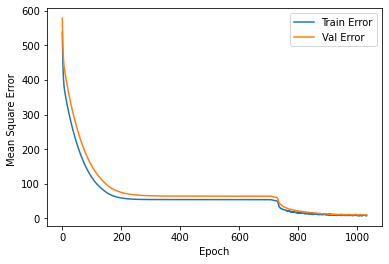

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
predictions = np.round(model.predict(X_test),1)

In [ ]:
predictions

array([[14.8],
       [24.9],
       [20.4],
       [22.1],
       [20.1],
       [25.8],
       [33.7],
       [26.7],
       [33.2],
       [33.3],
       [33.7],
       [32.4],
       [33.7],
       [20.5],
       [24.1],
       [19.9],
       [20.5],
       [33.8],
       [29.2],
       [33.6],
       [18.6],
       [14.8],
       [16.4],
       [20.9],
       [21.1],
       [30.2],
       [26.1],
       [30. ],
       [26.2],
       [26.9],
       [13.1],
       [16.6],
       [24.4],
       [27. ],
       [14.2],
       [33.6],
       [13.8],
       [26.6],
       [20.2],
       [33.4],
       [26. ],
       [19.6],
       [30.7],
       [18.1],
       [15.3],
       [16.4],
       [19.4],
       [26.4],
       [22. ],
       [14.4],
       [14.1],
       [22.5],
       [14.6],
       [25.8],
       [30. ],
       [19.6],
       [20.2],
       [14.1],
       [22.8],
       [18.6],
       [33.4],
       [23.2],
       [13.3],
       [16.9],
       [32.2],
       [30.5],
       [22

In [ ]:

result = root_mean_squared_error(y_test, predictions)
result

3.4391786222826957

In [ ]:

r2 = r2_score(y_test,predictions)
r2

0.81060425573924

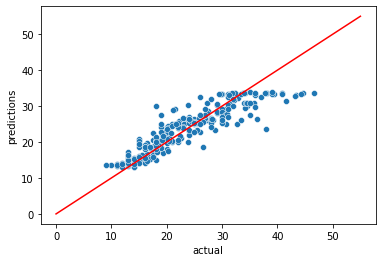

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()